<a href="https://colab.research.google.com/github/Barbozah/AprendizagemDeMaquina/blob/master/PrevisaodeAtaquesCardiacosKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de ataque cardíaco


## Descrição da Base de dados


A base de dados contém cerca de 300 dados sobre pacientes do hospital da cidade de Cleveland do Estado de Ohio nos Estados Unidos.

### Seus atributos são: 
1. id: número de identificação do paciente
2. ccf: número da previdência social (substituído por um valor fictício de 0)
3. age: idade em anos
4. sex: sexo (1 = masculino; 0 = feminino)
5. painloc: localização da dor no peito (1 = subesternal; 0 = caso contrário)
6. painexer: (1 = provocado pelo esforço; 0 = caso contrário)
7. relrest: (1 = aliviado após o descanso; 0 = caso contrário)
8. pncaden: (soma de 5, 6 e 7)
9. cp: tipo de dor no peito: (Valor 1: angina típica - Valor 2: angina atípica - Valor 3: dor não anginosa - Valor 4: assintomática)
10. trestbps: pressão arterial em repouso (em mmHg na admissão ao hospital)
11. htn
12. col: soro colestoral em mg / dl
13. smoke: eu acredito que isso é 1 = sim; 0 = não (é ou não é fumante)
14. cigs: (cigarros por dia)
15. years: (número de anos como fumante)
16. fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
17. dm (1 = história de diabetes; 0 = sem tal história)
18. famhist: história familiar de doença arterial coronariana (1 = sim; 0 = não)
19. restecg: resultados eletrocardiográficos de repouso - Valor 0: normal - Valor 1: ter anormalidade da onda ST-T (inversões da onda T e / ou supradesnivelamento do segmento ST ou depressão> 0,05 mV) - Valor 2: mostrando provável ou definitivo ventrículo esquerdo hipertrofia pelo critério de Estes 20 ekgmo (mês de leitura do ECG de exercício) 21 ekgday (dia do exercício leitura do ECG) 22 ekgyr (ano de exercício leitura do ECG) 23 dig (digitalis usado exercício do exercício ECG: 1 = sim; 0 = não) 24 prop (betabloqueador utilizado durante o exercício ECG: 1 = sim; 0 = não) 25 nitr (nitratos utilizados durante o exercício ECG: 1 = sim; 0 = não) 26 pro (bloqueador dos canais de cálcio utilizado durante o exercício ECG: 1 = sim; = no) 27 diurético (diurético usado durante o exercício ECG: 1 = sim; 0 = não) 28 proto: protocolo de exercício



### Criadores:
1. Instituto Húngaro de Cardiologia. Budapeste: Andras Janosi, M.D.
2. Hospital Universitário, Zurique, Suíça: William Steinbrunn, M.D.
3. Hospital Universitário, Basel, Suíça: Matthias Pfisterer, M.D.
4. V.A. Centro Médico, Long Beach e Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

## Objetivo do projeto

Prever o risco de ataque do cardíaco num novo paciente dado, com base nos dados já obtidos e essa previsão será com base num dado risco classificado de (0 a 4).
O algoritmo de *machine learning* selecinado para este projeto foi o KNN, visto que temos pouco mais que 300 dados disponíveis e este algoritmo é ótimo para base de dados que contém poucos dados.

# Aplicação

In [0]:
#importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
#Leitura dos dados
!git clone https://github.com/Barbozah/AprendizagemDeMaquina.git
base = pd.read_csv("AprendizagemDeMaquina/dados/heart.csv")
base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
#Validação cruzada, utilizando parametros de 1 a 50
k_range = range(1, 50)
scores = {}
scores_list = []

In [0]:
#Separação dos dados dos rótulos
X = base.loc[:,'age':'thal']
y = base.loc[:,'target']
#Divisão entre parte de treino e parte de teste, utilizando 5% para teste e 95% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 4)

In [0]:
#Realização da validação cruzada
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

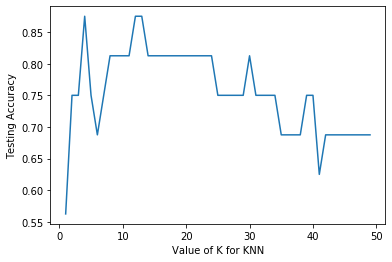

In [0]:
#Gráfico demostrando a alteração dos valores de vizinhos, para encontrar o melhor valor.
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')